# Encontrando Soluções

O Sympy tem diversas ferramentas para encontrar a soluções de equações, sistemas, EDO, etc de forma simbólica.


In [ ]:
from sympy import init_session
init_session(use_latex="mathjax")

### Equações

O `solveset` é uma função do SymPy utilizada para encontrar soluções de equações etc de forma simbólica. 

Antigamente, a função utilizada era `solve()`, mas ela foi substituída (veja mais em http://docs.sympy.org/latest/modules/solvers/solveset.html).

A sintaxe é

``solveset(equação, variável)``

No exemplo abaixo tentamos buscar o conjunto solução da equação $x^2-x=4$, que para denota-lá usamos `Eq(x**2 - x,4)`

In [ ]:
solveset(Eq(x**2 - x,4), x)

⎧1   √17  1   √17⎫
⎨─ - ───, ─ + ───⎬
⎩2    2   2    2 ⎭

Se `Eq()` não for utilizado, assume-se que a equação é igual a 0.

In [ ]:
solveset(x**2 - x, x)

{0, 1}

A função `solveset` no **SymPy** permite restringir as soluções de uma equação a um determinado domínio. Os principais domínios de restrição são:

1. **`S.Reals`**: 
   - Restringe as soluções aos números reais.
   - Exemplo: Encontrar soluções reais para uma equação.

2. **`S.Integers`**: 
   - Restringe as soluções aos números inteiros.
   - Exemplo: Encontrar soluções inteiras para uma equação.

3. **`S.Complexes`**: 
   - Restringe as soluções aos números complexos.
   - Este é o comportamento padrão se nenhum domínio for especificado.
   - Exemplo: Encontrar soluções complexas para uma equação.

4. **`Interval`**:
   - Restringe as soluções a um intervalo específico.
   - Você pode definir um intervalo com a função `sp.Interval(inicio, fim)`, onde `inicio` e `fim` são os limites do intervalo.
   - Exemplo: Encontrar soluções de uma equação dentro do intervalo [0, 3].


In [ ]:
solveset(sin(x) - 1, x, domain=S.Reals)

⎧        π │      ⎫
⎨2⋅n⋅π + ─ │ n ∊ ℤ⎬
⎩        2 │      ⎭

em que o conjunto Z representa os inteiros.

O `root` é um método do SymPy que permite encontrar a raiz de uma equação ou expressão simbólica. Ele é mais usaddo para encontrar raízes diretas de polinômios simples, enqual o `solveset` para equações gerais com maior flexibilidade e controle sobre o domínio.

In [ ]:
solveset(x**3 - 6*x**2 + 9*x, x)

{0, 3}

In [ ]:
roots(x**3 - 6*x**2 + 9*x, x)

{0: 1, 3: 2}

O número 0 representa uma raiz única, enquanto o número 3 indica duas raízes que coincidem.


### Sistemas Lineares

O `linsolve()` é uma função do SymPy utilizada para encontrar soluções de sistemas de equações lineares de forma simbólica. 

Sua sintaxe é:

`linsolve([expr1, expr2], [variavel1, variavel2])`

In [ ]:
linsolve([x - y + 2, x + y - 3], [x, y])

{(1/2, 5/2)}

In [ ]:
linsolve([x + y + z - 1, x + y + 2*z - 3 ], (x, y, z))

{(-y - 1, y, 2)}

### Equações Diferenciais

É necessário ter uma função indefinida (f e g já estão definidas como indefinidas por meio da nossa `init_session()` mencionada acima, mas é provável que já tenhamos reiniciado essas funções).


In [ ]:
f, g = symbols('f g', cls=Function)

Assim

In [ ]:
f(x)

f(x)

Para termos a derivida de $f$ fazemos

In [ ]:
f(x).diff(x)

d       
──(f(x))
dx      

Consequentemos podemos escrever uma equação usando derivadas

In [ ]:
diffeq = Eq(f(x).diff(x, 2) - 2*f(x).diff(x) + f(x), sin(x))

In [ ]:
diffeq

                      2               
         d           d                
f(x) - 2⋅──(f(x)) + ───(f(x)) = sin(x)
         dx           2               
                    dx                

Tais equações envolvendo derivadas ordinárias são chamadas de EDO (equações diferencias ordinárias) e para resolve-las o Sympy tem a função `dsolve`

In [ ]:
dsolve(diffeq, f(x))

                    x   cos(x)
f(x) = (C₁ + C₂⋅x)⋅ℯ  + ──────
                          2   

### Matrizes

Considere uma matriz qualquer

$$
A = \left ( \begin{array}{ccc} u  & p    & 0 \\                          
                                  0  &  u       & 1/p\\                     
                                  0  & c^2 p & u \end{array} \right ) $$


Vamos trabalhar com a matriz de Vandermonde para exemplificar

Para definir a mariz usamos o comando `Matrix`, mas antes precisamos especificar os simbolos que vamos utilizar usando `symbols`

In [ ]:
p, u, c = symbols('p u c')
A = Matrix([[u, p, 0], [0, u, p**-1], [0, c**2 * p, u]])
A

⎡u   p    0⎤
⎢          ⎥
⎢         1⎥
⎢0   u    ─⎥
⎢         p⎥
⎢          ⎥
⎢    2     ⎥
⎣0  c ⋅p  u⎦

Caso quisessemos letras gregas precisariamos importar ela diretamente de `sympy.ab`, utilizando o comando:

``from sympy.abc import `` + letra

In [ ]:
from sympy.abc import rho, alpha
p, u, c = symbols('rho alpha c')
A = Matrix([[u, p, 0], [0, u, p**-1], [0, c**2 * p, u]])
A

⎡α   ρ    0⎤
⎢          ⎥
⎢         1⎥
⎢0   α    ─⎥
⎢         ρ⎥
⎢          ⎥
⎢    2     ⎥
⎣0  c ⋅ρ  α⎦

In [ ]:
A.row(0)

[α  ρ  0]

The eigenvalues of the system are the speeds at which information propagates

In [ ]:
A.eigenvals()

{α: 1, α - c: 1, α + c: 1}

A diagonalização (ou decomposição espectral) de uma matriz quadrada $A$ é dada por:
$$ A = PDP^{-1}$$
onde $P$ é a matriz dos autovetores e $D$ a matriz dos autovalores.

Podemos obter tais matrizes utilizando `.diagonalize`

In [ ]:
P, D = A.diagonalize()

Assim, $D$ irá fornecer uma matriz diagonal cujos elementos são os autovalores de $A$.

In [ ]:
D

⎡0  0       0     ⎤
⎢                 ⎥
⎢0  0       0     ⎥
⎢                 ⎥
⎢       4    2    ⎥
⎣0  0  x  + x  + 1⎦

Enquanto $P$ a matriz cujas colunas são os autovetores de $A$.

In [ ]:
P

⎡      2  1 ⎤
⎢-x  -x   ──⎥
⎢          2⎥
⎢         x ⎥
⎢           ⎥
⎢         1 ⎥
⎢1    0   ─ ⎥
⎢         x ⎥
⎢           ⎥
⎣0    1   1 ⎦

Além disso, podemos calcula a inversa de $A$ utilizando `**-1`

In [ ]:
A**-1

⎡1      ρ           -1      ⎤
⎢─  ─────────   ─────────── ⎥
⎢α     2    2      3      2 ⎥
⎢   - α  + c    - α  + α⋅c  ⎥
⎢                           ⎥
⎢      -α            1      ⎥
⎢0  ─────────  ─────────────⎥
⎢      2    2     2      2  ⎥
⎢   - α  + c   - α ⋅ρ + c ⋅ρ⎥
⎢                           ⎥
⎢       2                   ⎥
⎢      c ⋅ρ          α      ⎥
⎢0  ─────────     ───────   ⎥
⎢      2    2      2    2   ⎥
⎣   - α  + c      α  - c    ⎦

ou usando o comando `.inv()`

In [ ]:
A.inv()

⎡1      ρ           -1      ⎤
⎢─  ─────────   ─────────── ⎥
⎢α     2    2      3      2 ⎥
⎢   - α  + c    - α  + α⋅c  ⎥
⎢                           ⎥
⎢      -α            1      ⎥
⎢0  ─────────  ─────────────⎥
⎢      2    2     2      2  ⎥
⎢   - α  + c   - α ⋅ρ + c ⋅ρ⎥
⎢                           ⎥
⎢       2                   ⎥
⎢      c ⋅ρ          α      ⎥
⎢0  ─────────     ───────   ⎥
⎢      2    2      2    2   ⎥
⎣   - α  + c      α  - c    ⎦

Além disso ele faz operações de multiplicação apenas utilizando o comando `*`

In [ ]:
C = A**-1
A * C


⎡1  0  0⎤
⎢       ⎥
⎢0  1  0⎥
⎢       ⎥
⎣0  0  1⎦

Usando o `simplify`, obtemos a matriz A

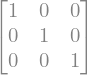

In [ ]:
simplify(A*C)

```{tabbed} Exercício
Verifique que $PDP^{-1}$ resulta em $A$
```

```{tabbed} Solução
```python
C = P**-1

P * D * C

```